In [1]:
import sys
sys.path.insert(0, '../src/')

import torch
from torch.utils.data import DataLoader
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
import torch.backends.cudnn as cudnn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms

import resnet
from train_utils import train_model, one_cycle
from plots import plot_learning_curves, plot_lr_finder, plot_learning_rates, plot_momentums

import time

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cudnn.benchmark = True

# Super convergence

## Load the datasets

In [3]:
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
trainset.train_data.shape, len(trainset.train_labels)

((50000, 32, 32, 3), 50000)

In [6]:
trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=128, shuffle=True, num_workers=2)

In [7]:
dset_loaders = {'train': trainloader, 'val': testloader}
dset_sizes = {'train': len(trainset.train_labels), 'val': len(testset.test_labels)}

In [8]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Defining the model

In [9]:
model = resnet.ResNet18()

if torch.cuda.is_available():
    model.cuda()

In [10]:
criterion = CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.001, momentum=0, weight_decay=5e-4)

## Building the 1-cycle optimizer

In [13]:
curves = one_cycle(model, dset_loaders, dset_sizes, criterion, optimizer, epochs=90, \
                   lr_min=0.01, lr_max=1, mom_min=0.85, mom_max=0.95, annealing_pct=0.1)

##### Computing upcycle phase #####

Epoch 1/40
----------
train loss: 0.0111, acc: 0.4758
val loss: 0.0094, acc: 0.5908

Epoch 2/40
----------
train loss: 0.0071, acc: 0.6808
val loss: 0.0064, acc: 0.7218

Epoch 3/40
----------
train loss: 0.0055, acc: 0.7568
val loss: 0.0060, acc: 0.7412

Epoch 4/40
----------
train loss: 0.0049, acc: 0.7836
val loss: 0.0054, acc: 0.7586

Epoch 5/40
----------
train loss: 0.0045, acc: 0.8001
val loss: 0.0064, acc: 0.7281

Epoch 6/40
----------
train loss: 0.0045, acc: 0.8056
val loss: 0.0078, acc: 0.6608

Epoch 7/40
----------
train loss: 0.0045, acc: 0.8021
val loss: 0.0060, acc: 0.7479

Epoch 8/40
----------
train loss: 0.0045, acc: 0.8033
val loss: 0.0077, acc: 0.6823

Epoch 9/40
----------
train loss: 0.0046, acc: 0.7999
val loss: 0.0081, acc: 0.6831

Epoch 10/40
----------
train loss: 0.0047, acc: 0.7931
val loss: 0.0092, acc: 0.5912

Epoch 11/40
----------
train loss: 0.0047, acc: 0.7946
val loss: 0.0070, acc: 0.7055

Epoch 12/40
----------
tra

## Plotting the learning curves

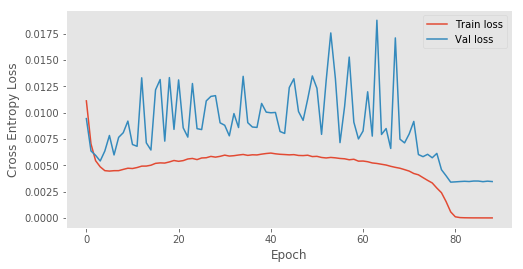

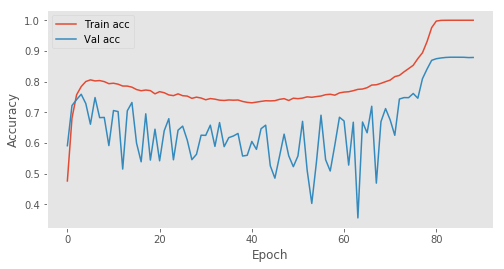

In [14]:
plot_learning_curves(curves[0], curves[1], curves[2], curves[3])

In [22]:
print('train loss: {}, val loss: {}, train acc: {}, val_acc:{}'.format(curves[0][-1], 
                                                                       curves[1][-1], 
                                                                       curves[2][-1], 
                                                                       curves[3][-1]))

train loss: 2.208340527955443e-05, val loss: 0.0034724787771701813, train acc: 1.0, val_acc:0.8786


Text(0,0.5,'Learning rate')

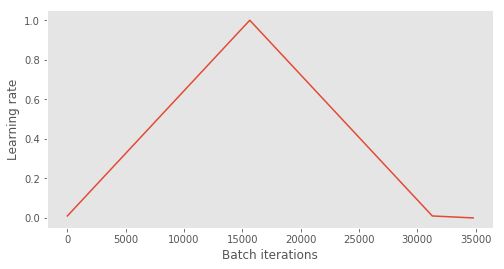

In [20]:
plot_learning_rates(curves[4])

Text(0,0.5,'Momentum')

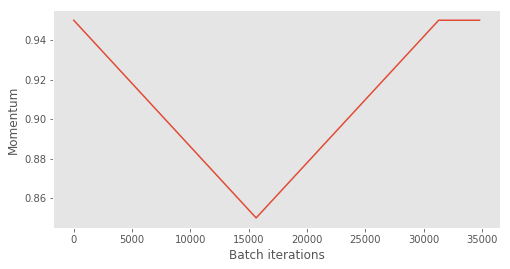

In [17]:
plot_momentums(curves[5])